In [312]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

LOG_FILE = 'gail.rl.walker.run.trpo.1.log'

In [313]:
ep_rew_mean = []
mean_kl = []
entropy = []
ev_tdlam_before = []
optim_gain = []
surr_gain = []
with open(LOG_FILE, 'r') as log:
    for line in log:
        if "EpRewMean" in line:
            ep_rew_mean.append(float(line.split('|')[2]))
        elif "meankl" in line:
            mean_kl.append(float(line.split('|')[2]))
        elif "entropy" in line:
            entropy.append(float(line.split('|')[2]))
        elif "ev_tdlam_before" in line:
            ev_tdlam_before.append(float(line.split('|')[2]))
        elif "optimgain" in line:
            optim_gain.append(float(line.split('|')[2]))
        elif "surrgain" in line:
            surr_gain.append(float(line.split('|')[2]))
            
ep_rew_mean = np.array(ep_rew_mean)
mean_kl = np.array(mean_kl)
entropy = np.array(entropy)
ev_tdlam_before = np.array(ev_tdlam_before)
optim_gain = np.array(optim_gain)
surr_gain = np.array(surr_gain)

In [314]:
def ewma(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha
    n = data.shape[0]

    pows = alpha_rev**(np.arange(n+1))

    scale_arr = 1/pows[:-1]
    offset = data[0]*pows[1:]
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

In [315]:
smooth_mean = ewma(ep_rew_mean, 50)

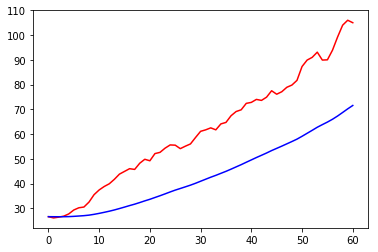

In [316]:
plt.plot(ep_rew_mean, 'r', smooth_mean, 'b')

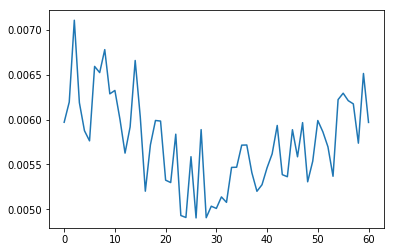

In [317]:
plt.plot(mean_kl)

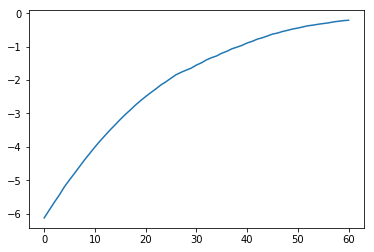

In [318]:
plt.plot(ewma(ev_tdlam_before, 50))

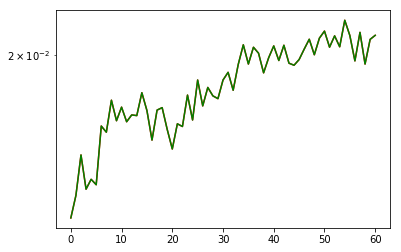

In [319]:
plt.semilogy(optim_gain, 'r', surr_gain, 'g')

In [323]:
import io
import base64
from IPython.display import HTML

iteration = len(ep_rew_mean) // 50

video = io.open('videos/walker_run_trpo_iteration_{}.mp4'.format(iteration), 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

FileNotFoundError: [Errno 2] No such file or directory: 'videos/walker_run_trpo_iteration_1.mp4'